# Imports

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from matplotlib.pyplot import hist
from matplotlib import rcParams
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline
!pip install seaborn==0.9.0
import seaborn as sbn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from MEG_pareidolia_utils import *


# Constantes

In [120]:
#Behavioral Data
BEHAVDATA_PATH = '/behav_data/'
#STIMSETS = [1,2,3]

In [6]:
#Questionnaire Data
GOUGH_QUESTIONS = [7, 9, 12, 14, 15, 17, 19, 20, 21, 24, 27, 29]
PHENO_QUESTIONS_REV = [18, 32]

GROUPS = ['crea_group', 'schi_group', 'creact_group', 'aber_group', 'creagen_group']

In [2]:
FOLDERPATH = r'D:\PsychoPy_MEG\BIDS_data'
behav_name, behav_path = get_pareidolia_bids(FOLDERPATH, '02', 'pareidolia', '1', stage = 'behav')
behav = pd.read_csv(behav_path)
behav = arrange_dataframe(behav)
behav

,ImageFile,FD,Contrast,practice,trials_practice.thisTrialN,trials_practice.thisN,trials_practice.thisIndex,trials_1.thisRepN,trials_1.thisTrialN,trials_1.thisN,...,participant,date,expName,frameRate,Unnamed: 126,positive_n_objets,boolean_n_objets,trials.thisRepN,bloc,reaction_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,images\fd_contrast_1.35_16.tiff.tif,1.350,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,0.0,0.0,8.0,8.0,NaN
432,images\fd_contrast_1.575_16.tiff.tif,1.575,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,0.0,0.0,8.0,8.0,NaN
433,images\fd_1.8_16.tiff.tif,1.800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,1.0,1.0,8.0,8.0,1.791249
434,images\fd_1.725_16.tiff.tif,1.725,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2021_May_12_1413,Cloud_Experiment_FR_REAL,119.957871,NaN,0.0,0.0,8.0,8.0,NaN


In [55]:
FILEPATH_QUEST = 'questionnaire_data/'
question_frame = get_question_data(FILEPATH_QUEST)
question_frame = prepare_questionnaire(question_frame)
question_frame = question_frame.sort_values(by=['participant'])

In [56]:
question_frame[['aber', 'flow_disp', 'participant', 'crea_specific_total']]
np.array(question_frame['crea_tot'])

array([225, 224, 154, 188, 196, 198, 196, 161], dtype=int64)

0.20667631612543869

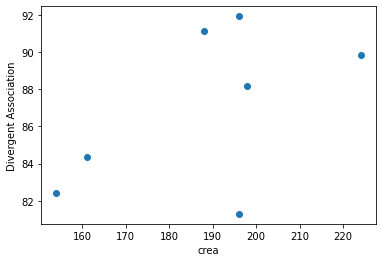

In [57]:
from scipy.stats import pearsonr

crea = [3.59090909, 2.61363636, 2.88636364, 2.97727273,
       3.15909091, 2.93181818, 2.59090909]
crea_tot = [224, 154, 188, 196, 198, 196, 161]
DAT = [89.8480494750575, 82.43658914275113, 91.14318919101996, 81.29630597485674, 88.20326247341221, 91.93046234681138, 84.33507011671152]
corr, p = pearsonr(crea_tot, DAT)
plt.scatter(crea_tot, DAT)
plt.xlabel('crea')
plt.ylabel('Divergent Association') 
p

# Définition des fonctions

In [54]:
#######################################################################################
#######################################################################################
############################## Questionnaires
  
# Get Questionnaire data
def get_question_data(filepath_quest):
    # rajouter de quoi créer/modifier fichier alldata déjà existant
    filename = filepath_quest + '/' + 'Questionnaires Pareidolie_FINAL_MEG.csv'
    question_frame = pd.read_csv(filename, encoding='utf-8')
    return question_frame


def prepare_questionnaire(question_frame):
    ## Other stuff
    # Create dummy column at the beginning
    question_frame.insert(loc=0, column='A', value='Horodateur')
    # Rename columns
    question_frame.rename(columns={'Numéro de participant':'participant'}, inplace=True)
    question_frame.rename(columns={'Veuillez indiquer le type d\'activité':'act_creative_pheno'}, inplace=True)
    # Change participant 1 for 12
    #question_frame.loc[:, 'participant'].replace([1], [12], inplace=True)
    ## Compute variables
    question_frame = pheno_crea(question_frame)

    return question_frame

def pheno_crea(question_frame):
  # Arrange reversed questions
    for p in PHENO_QUESTIONS_REV:
        question_frame.iloc [:, p] = question_frame.iloc[:, p] -6
        question_frame.iloc[:, p]= abs(question_frame.iloc[:,p])
    col1 = question_frame.iloc[: , [5, 6, 7, 9, 10, 14, 23, 24, 42, 44]]
    question_frame['crea_distinct'] = col1.sum(axis=1)
    col2 = question_frame.iloc[: , [11, 13, 15, 16, 17, 18, 19, 27]]
    question_frame['crea_anx'] = col2.sum(axis=1)
    col3 = question_frame.iloc[: , [8, 12, 20, 21, 22, 25, 26, 28, 34, 39]]
    question_frame['crea_absorp'] = col3.sum(axis=1)
    col4 = question_frame.iloc[: , [29, 30, 32, 33, 35, 36, 37, 38, 40, 41, 43, 47]]
    question_frame['crea_pow_pleas'] = col4.sum(axis=1)
    col5 = question_frame.iloc[: , [4, 31, 45, 46]]
    question_frame['crea_clar_prep'] = col5.sum(axis=1)
    question_frame['crea_specific_total'] = question_frame.iloc[:, 4:48].mean(axis=1)
    col6 = question_frame.iloc[: , [5,6,7,9,10,14,23,24,42,44,8,12,20,21,22,25,26,28,34,39,29,30,32,33,35,36,37,38,40,41,43,47]]
    question_frame['crea_pow_abs_dist'] = col6.sum(axis=1)
    question_frame['crea_pow_abs_distM'] = col6.mean(axis=1)
    coll1 = question_frame.iloc[: , [49, 50, 52, 56, 58, 59, 62]]
    question_frame['crea_gen_transform'] = coll1.sum(axis=1)
    coll2 = question_frame.iloc[: , [48, 51, 53, 55, 57, 60, 61, 63, 65]]
    question_frame['crea_gen_center'] = coll2.sum(axis=1)
    coll3 = question_frame.iloc[: , [54, 64, 66]]
    question_frame['crea_gen_transpers'] = coll3.sum(axis=1)
    coll4 = question_frame.iloc[: , 48:67]
    question_frame['crea_gen'] = coll4.sum(axis=1)
    question_frame['crea_tot'] = question_frame['crea_gen']+question_frame.iloc[:, 4:48].sum(axis=1)


    question_frame['flow_disp'] = question_frame.iloc[:, 68:104].mean(1)
    question_frame['schi_inhab'] = question_frame.iloc[:, 104:116].sum(1)
    question_frame['schi_desorg'] = question_frame.iloc[:, 116:127].sum(1)
    question_frame['schi_anhe'] = question_frame.iloc[:, 127:137].sum(1)
    question_frame['schi_impuls'] = question_frame.iloc[:, 137:147].sum(1)
   
    question_frame['schi'] = question_frame.iloc[:, 104:147].sum(1)
    question_frame['rev_del'] = question_frame.iloc[:, 147:151].sum(1)
    question_frame['rev_spont'] = question_frame.iloc[:, 151:155].sum(1)
    question_frame['aber'] = question_frame.iloc[:, 155:184].sum(1)


    return question_frame





In [107]:
l = [112,131]
x = [x-64 for x in l]
x

[48, 67]

In [7]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues



def get_behavdata(path):
# rajouter de quoi créer/modifier fichier alldata déjà existant
    all_data_ = []
    filenames = glob.glob(path + "/*.csv")
    ss_data_ = []
    # This loop reads each CSV file of each StimSet and concatenates it into one file
    for filename in filenames:
        temp_mat = pd.read_csv(filename)
        ss_data_.append(temp_mat)
    ss_frame = pd.concat(ss_data_, axis=0, ignore_index=True)
    all_data_.append(ss_frame)
    # all_data_['Stimset'] = ss
    all_frame = pd.concat(all_data_, axis=0, ignore_index=True)
    return all_frame

In [0]:

##Grouping for questionnaires
def group(row, var):
   
    median = question_frame.loc[:, var].median()
    if row[var] < median :
      return 0

    return 1

  
#CREATES GROUP CONSTANT FOR LONG DATA
def list_group(df, var):
  
  group1 = []
  group2 = []
  
  for p in range(len(df)):
  
    if df.loc[p, var] == 0:
      group1.append(df.loc[p, 'participant'])
    if df.loc[p, var] == 1:
      group2.append(df.loc[p, 'participant'])  
 
  return group1, group2

#CREATE LONG DATAFRAME WITH GROUPS
def behav_long_group(behav_frame_x):

  #behav_frame['crea_group'] = behav_frame['FD']
  #behav_frame['schi_group'] = behav_frame['FD']
  #behav_frame['creact_group'] = behav_frame['FD']
  #behav_frame['aber_group'] = behav_frame['FD']


  for group in GROUPS:  
    #Creates empty variable
    behav_frame_x[group] = np.nan
    #Group_creative_subscales
    
    for number in range(1, 3):
    
      group2 = group + str(number)
      group3 = mydict[group2]
      for zero in group3:
        
        if group2.endswith('1'): behav_frame_x.loc[behav_frame_x['participant']== zero,[group]] = 0
        if group2.endswith('2'): behav_frame_x.loc[behav_frame_x['participant']== zero,[group]] = 1  
          

    behav_frame_x['participantX'] = behav_frame_x['participant']


  return behav_frame_x



In [0]:
FILEPATH_QUEST = r'/content/drive/My Drive/Data_Pareidolia'


# Get QUESTION FRAME
question_frame = get_question_data(FILEPATH_QUEST)
question_frame = prepare_questionnaire(question_frame)
question_frame = question_frame.sort_values(by=['participant'])

# Get BEHAVIORAL FRAME
behav_frame = get_behavdata()
behav_frame = arrange_dataframe(behav_frame)
behav_frame['participantX'] = behav_frame['participant']
behav_frame['FDX'] = behav_frame['FD']
behav_frame['diversity'] = behav_frame['Redondance_question.response']

##GET FLOW DATA
flow_frame = get_flow_data(FILEPATH_QUEST)
flow_frame.loc[:, 'participant'] = flow_frame.loc[:, 'Numéro de participant']
flow_frame = flow_frame.sort_values(by=['participant'])
flow_frame.loc[:, 'engeser_tot'] = flow_frame.iloc[:, 12:22].mean(1)
flow_frame = flow_frame.reset_index()
flow_frame.loc[:, 'flow_diff'] = flow_frame.loc[:, 'Comparativement à toutes les autres activités auxquelles je participe, celle-ci était']
flow_frame.loc[:, 'flow_comp'] = flow_frame.loc[:, 'Je pense que mes compétences dans cette activité sont ']
flow_frame.loc[:, 'flow_defi'] = flow_frame.loc[:, 'Pour moi personnellement, la demande actuelle de cette activité était (1 = trop basse, 5 = juste parfaite, 9 = trop élevée)']
flow_frame = flow_frame.loc[:, ['participant', 'engeser_tot', 'flow_diff', 'flow_comp', 'flow_defi']]


# 
behav_frame2 = behav_frame
behav_frame2['flow'] = behav_frame2.iloc[:, range(4, 24 ,2)].sum(1)
behav_frame2.loc[:, 'flow'] = behav_frame2.loc[:, 'flow'].replace(0, np.NaN)
behav_frame2 = behav_frame.groupby(['participant']).mean()
behav_frame2 = behav_frame2.reset_index()
behav_frame2 = behav_frame2.loc[:, ['flow', 'participant']]
question_frame_flow = pd.merge(flow_frame, behav_frame2, on='participant', how='outer')
question_frame= pd.merge(question_frame, question_frame_flow, on='participant', how='outer')
question_frame = question_frame.sort_values(by=['participant'])
question_frame['flow_tot'] = question_frame.loc[:, ['flow', 'engeser_tot']].mean(axis=1)
question_frame = question_frame[question_frame.participant != 15]

#Create GROUPS
question_frame['crea_group'] = question_frame.apply (lambda row: group(row, 'crea_pow_abs_dist'),axis=1)
question_frame['crea_groupM'] = question_frame.apply (lambda row: group(row, 'crea_pow_abs_distM'),axis=1)
question_frame['schi_group'] = question_frame.apply (lambda row: group(row, 'schi'),axis=1)
question_frame['aber_group'] = question_frame.apply (lambda row: group(row, 'aber'),axis=1)
question_frame['creact_group'] = question_frame.apply (lambda row: group(row, 'creative_act'),axis=1)
question_frame['creagen_group'] = question_frame.apply (lambda row: group(row, 'crea_gen'),axis=1)


#Create GROUP CONSTANT
mydict = {}
mydict['crea_group1'], mydict['crea_group2'] = list_group(question_frame, 'crea_group')
mydict['crea_groupM1'], mydict['crea_groupM2'] = list_group(question_frame, 'crea_groupM')
mydict['schi_group1'], mydict['schi_group2'] = list_group(question_frame, 'schi_group')
mydict['aber_group1'], mydict['aber_group2'] = list_group(question_frame, 'aber_group')
mydict['creact_group1'], mydict['creact_group2'] = list_group(question_frame, 'creact_group')
mydict['creagen_group1'], mydict['creagen_group2'] = list_group(question_frame, 'creagen_group')



#create Behavioral DataFrame with Groups

behav_frame_long = behav_long_group(behav_frame)

In [0]:



#create Behavioral DataFrame grouped by Participant and merge with Question Frame
behav_frame_participant = behav_frame.groupby(['participant']).mean()
behav_frame_participant = behav_frame_participant.reset_index()
behav_frame_participant = behav_frame_participant[behav_frame_participant.participant != 13]
behav_frame_participant = behav_frame_participant[behav_frame_participant.participant != 15]
behav_frame_participant = behav_frame_participant.reset_index()
#behav_frame_participant.loc[:, 'participant'] = behav_frame_participant.index

question_frame = question_frame.reset_index()

total_frame = pd.concat([behav_frame_participant, question_frame], axis=1)
#total_frame = question_frame.merge(behav_frame_participant, how = 'inner', on = ['participant'])


#Create DataFrame grouped by Participant and Fractal Dimension
behav_frame_participantFD = behav_frame.groupby(['participant','FD']).mean()


question_frame_rep = pd.concat([question_frame]*12, ignore_index=True) # Ignores the index
question_frame_rep = question_frame_rep.sort_values(by=['participant'])


#Create behavioral DataFrame grouped by Participant and Fractal Dimension and merge with QUESTIONNAIRES

question_frame_rep = question_frame_rep.reset_index()
behav_frame_participantFD.loc[:, 'index'] = behav_frame_participantFD.index
behav_frame_participantFD = behav_frame_participantFD[behav_frame_participantFD.participantX != 13]
behav_frame_participantFD = behav_frame_participantFD[behav_frame_participantFD.participantX != 15]
behav_frame_participantFD = behav_frame_participantFD.reset_index()
question_frame_rep.loc[:, 'index'] = question_frame_rep.index



total_frame2 = pd.concat([behav_frame_participantFD, question_frame_rep], axis=1)


#A régler

total_frame2.loc[:, 'crea_groupX'] = total_frame2.loc[:, 'crea_group']
total_frame2['crea_groupX'] = total_frame2['crea_group'].astype('int64')
total_frame2.loc[:, 'aber_groupX'] = total_frame2.loc[:, 'aber_group']
total_frame2['aber_groupX'] = total_frame2['aber_group'].astype('int64')
total_frame2.loc[:, 'creagen_groupX'] = total_frame2.loc[:, 'creagen_group']
total_frame2['creagen_groupX'] = total_frame2['creagen_group'].astype('int64')
total_frame2.loc[:, 'schi_groupX'] = total_frame2.loc[:, 'schi_group']
total_frame2['schi_groupX'] = total_frame2['schi_group'].astype('int64')
total_frame2.loc[:, 'creact_groupX'] = total_frame2.loc[:, 'creact_group']
total_frame2['creact_groupX'] = total_frame2['creact_group'].astype('int64')

total_frame.loc[:, 'crea_groupX'] = total_frame.loc[:, 'crea_group']
total_frame['crea_groupX'] = total_frame['crea_group'].astype('int64')
total_frame.loc[:, 'aber_groupX'] = total_frame.loc[:, 'aber_group']
total_frame['aber_groupX'] = total_frame['aber_group'].astype('int64')
total_frame.loc[:, 'creagen_groupX'] = total_frame.loc[:, 'creagen_group']
total_frame['creagen_groupX'] = total_frame['creagen_group'].astype('int64')
total_frame.loc[:, 'schi_groupX'] = total_frame.loc[:, 'schi_group']
total_frame['schi_groupX'] = total_frame['schi_group'].astype('int64')
total_frame.loc[:, 'creact_groupX'] = total_frame.loc[:, 'creact_group']
total_frame['creact_groupX'] = total_frame['creact_group'].astype('int64')


In [0]:
sbn.set(rc={'figure.figsize':(13.7,10.27)})

In [13]:
total_frame3 = total_frame.loc[:, ['participantX', 'crea_clar_prep',  'flow_disp', 'diversity', 'crea_gen', 'crea_pow_abs_dist', 'crea_specific_total', 'boolean_n_objets', 'gough', 'creative_act', 'flow_tot', 'aber', 'schi', 'positive_n_objets', 'n_objets.response', 'aber_groupX', 'crea_groupX', 'schi_groupX', 'creagen_groupX', 'reaction_time', 'vividness.response', 'creact_groupX']]
total_frame4 = total_frame2.loc[:, ['participantX', 'crea_clar_prep',  'flow_disp', 'crea_gen', 'diversity', 'crea_pow_abs_dist', 'boolean_n_objets', 'crea_specific_total', 'gough', 'creative_act', 'flow_tot', 'aber', 'schi', 'positive_n_objets', 'n_objets.response', 'FD', 'aber_groupX', 'crea_groupX', 'schi_groupX', 'creagen_groupX', 'reaction_time', 'vividness.response', 'creact_groupX']]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [12]:
total_frame.loc[:, ['participantX', 'crea_clar_prep',  'flow_disp', 'diversity', 'crea_gen', 'crea_pow_abs_dist', 'crea_specific_total', 'boolean_n_objets', 'gough', 'creative_act', 'flow_tot', 'aber', 'schi', 'positive_n_objets', 'n_objets.response', 'aber_groupX', 'crea_groupX', 'schi_groupX', 'creagen_groupX', 'reaction_time', 'vividness.response', 'creact_groupX', 'flow_tot']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,participantX,crea_clar_prep,flow_disp,diversity,crea_gen,crea_pow_abs_dist,crea_specific_total,boolean_n_objets,gough,creative_act,...,positive_n_objets,n_objets.response,aber_groupX,crea_groupX,schi_groupX,creagen_groupX,reaction_time,vividness.response,creact_groupX,flow_tot
0,1,13.0,3.944444,NaN,66.0,105.0,3.090909,0.591667,5.0,16.0,...,1.328638,0.786111,1,1,1,1,4.370057,2.830986,NaN,5.200
1,2,13.0,3.861111,NaN,53.0,84.0,2.613636,0.430556,2.0,8.0,...,1.109677,0.477778,0,0,0,0,4.688517,1.922581,NaN,5.200
2,3,13.0,3.916667,NaN,75.0,105.0,3.159091,0.336111,11.0,14.0,...,1.256198,0.422222,1,1,1,1,5.344361,2.425000,NaN,5.200
3,4,10.0,3.555556,NaN,73.0,125.0,3.545455,0.791667,9.0,13.0,...,1.859649,1.472222,1,1,1,1,4.750932,3.719298,NaN,4.600
4,5,20.0,4.805556,NaN,63.0,107.0,3.363636,0.727778,5.0,6.0,...,1.729008,1.258333,1,1,1,1,4.127944,2.302682,NaN,5.400
5,6,14.0,3.888889,NaN,44.0,105.0,3.272727,0.905556,5.0,6.0,...,1.944785,1.761111,1,1,1,0,4.362318,1.687117,NaN,5.300
6,7,9.0,3.611111,NaN,49.0,102.0,2.840909,0.644444,6.0,4.0,...,1.409483,0.908333,0,0,0,0,5.188257,2.327586,NaN,5.700
7,8,12.0,3.388889,NaN,67.0,80.0,2.386364,0.450000,1.0,12.0,...,1.722222,0.775000,1,0,1,1,8.000000,2.413580,NaN,5.800
8,9,15.0,4.750000,NaN,50.0,65.0,2.227273,0.177778,-2.0,10.0,...,1.109375,0.197222,0,0,0,0,5.143052,3.671875,NaN,4.625
9,10,17.0,4.722222,NaN,56.0,80.0,2.590909,0.694444,10.0,13.0,...,1.664000,1.155556,0,0,0,1,4.320686,2.140000,NaN,4.700


In [0]:



flow_frame.loc[:, ['engeser_tot', 'participant']]


,engeser_tot,participant
0,52,1
1,52,2
2,52,3
3,46,4
4,54,5
5,53,6
6,57,7
7,58,8
8,47,9
9,52,10


In [0]:

#total_frame = behav_frame_participant.merge(question_frame, how = 'inner', on = ['participant'])
behav_frame_long.loc[:, ['participant', 'crea_gen', 'crea_group', 'creagen_group', 'schi', 'schi_group', 'crea_pow_abs_dist', 'positive_n_objets', 'boolean_n_objets']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,participant,crea_gen,crea_group,creagen_group,schi,schi_group,crea_pow_abs_dist,positive_n_objets,boolean_n_objets
0,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
1,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
3,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
4,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
10,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
11,1,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0
12,1,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0
13,1,NaN,1.0,1.0,NaN,1.0,NaN,2.0,1.0
14,1,NaN,1.0,1.0,NaN,1.0,NaN,NaN,0.0


In [0]:

##MORE THAN 2 GROUPS#
  #sort by variable to groupby
  #iterate, 
  #eucledian




# VISUALISATION

In [0]:
plotX.figure.savefig("contrastBYvividBYcrea.png")

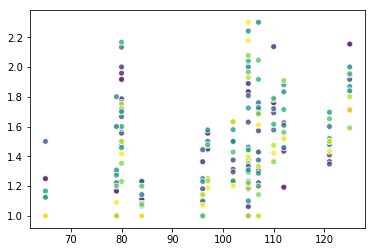

In [0]:
plt.scatter(x = total_frame2['crea_pow_abs_dist'], 
            y = total_frame2['positive_n_objets'], 
            c = total_frame2['FD']*150, # <== 😀 Look here!
            alpha=0.8, 
            edgecolors='w')

#plt.xlabel('Fractal dimension')
#plt.ylabel('Pareidolia')
#plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)

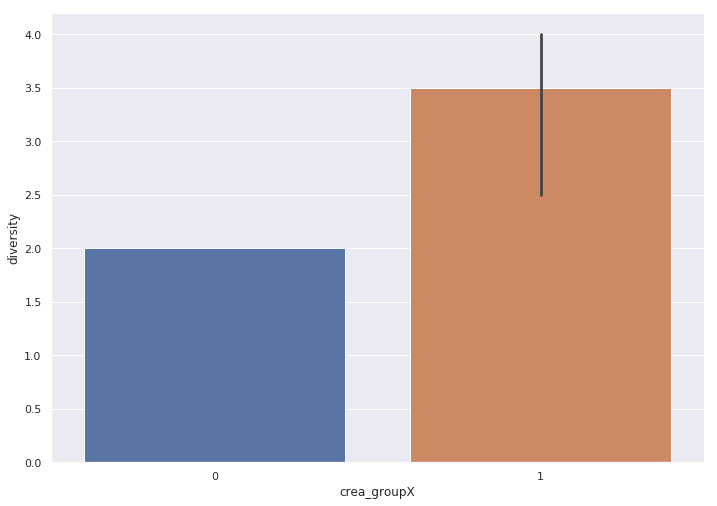

In [0]:
plot_crea = sbn.barplot(data=total_frame3,
                x='crea_groupX', 
                y='diversity', 
                ) # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                #fit_reg=True, # <== 😀 Look here!
                #legend=True,
                #Scatter_kws=dict(edgecolor="k", linewidth=0.5))

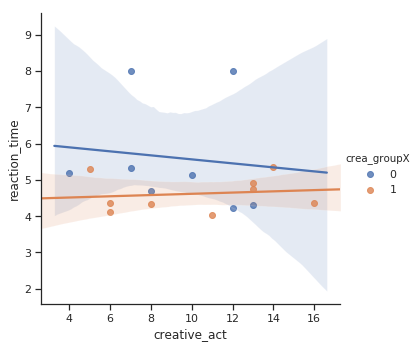

In [134]:
sbn.set(rc={'figure.figsize':(13.7,10.27)})
sbn.set_style('ticks', rc={'figure.figsize':(13.7,10.27)})

plot1 = sbn.lmplot(data=total_frame3,
                x='creative_act', 
                y='reaction_time',
                hue='crea_groupX',
                ) # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                #fit_reg=True, # <== 😀 Look here!
                #legend=True,
                #Scatter_kws=dict(edgecolor="k", linewidth=0.5))


In [0]:
total_frame3

,participantX,diversity,crea_gen,crea_pow_abs_dist,crea_specific_total,boolean_n_objets,gough,creative_act,flow_tot,aber,schi,positive_n_objets,n_objets.response,aber_groupX,crea_groupX,schi_groupX,creagen_groupX,reaction_time,vividness.response,creact_groupX
0,1,NaN,66.0,105.0,3.090909,0.591667,5.0,16.0,5.200,16.0,23.0,1.328638,0.786111,1,1,1,1,4.370057,2.830986,NaN
1,2,NaN,53.0,84.0,2.613636,0.430556,2.0,8.0,5.200,7.0,14.0,1.109677,0.477778,0,0,0,0,4.688517,1.922581,NaN
2,3,NaN,75.0,105.0,3.159091,0.336111,11.0,14.0,5.200,19.0,25.0,1.256198,0.422222,1,1,1,1,5.344361,2.425000,NaN
3,4,NaN,73.0,125.0,3.545455,0.791667,9.0,13.0,4.600,16.0,22.0,1.859649,1.472222,1,1,1,1,4.750932,3.719298,NaN
4,5,NaN,63.0,107.0,3.363636,0.727778,5.0,6.0,5.400,17.0,30.0,1.729008,1.258333,1,1,1,1,4.127944,2.302682,NaN
5,6,NaN,44.0,105.0,3.272727,0.905556,5.0,6.0,5.300,22.0,21.0,1.944785,1.761111,1,1,1,0,4.362318,1.687117,NaN
6,7,NaN,49.0,102.0,2.840909,0.644444,6.0,4.0,5.700,13.0,17.0,1.409483,0.908333,0,0,0,0,5.188257,2.327586,NaN
7,8,NaN,67.0,80.0,2.386364,0.450000,1.0,12.0,5.800,14.0,19.0,1.722222,0.775000,1,0,1,1,8.000000,2.413580,NaN
8,9,NaN,50.0,65.0,2.227273,0.177778,-2.0,10.0,4.625,0.0,9.0,1.109375,0.197222,0,0,0,0,5.143052,3.671875,NaN
9,10,NaN,56.0,80.0,2.590909,0.694444,10.0,13.0,4.700,7.0,11.0,1.664000,1.155556,0,0,0,1,4.320686,2.140000,NaN


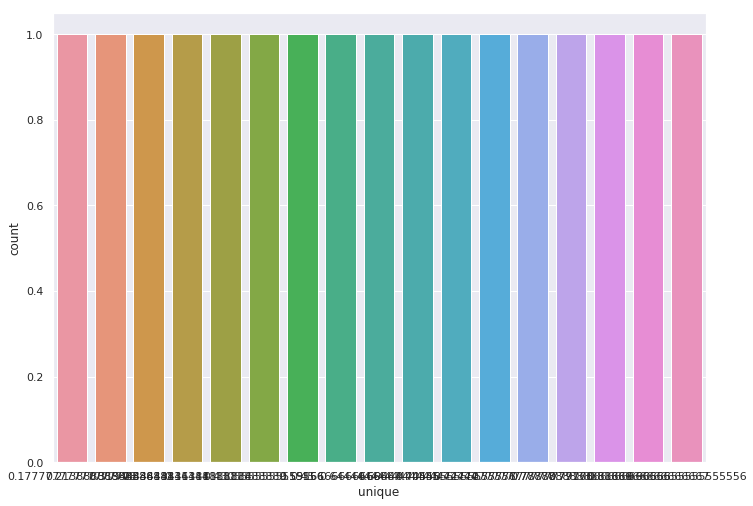

In [0]:
df_to_plot = pd.DataFrame()
df_to_plot['unique'], df_to_plot['count'] = np.unique(total_frame['boolean_n_objets'], return_counts=True)
sbn.barplot(x='unique', y='count', data=df_to_plot)

,crea_pow_abs_dist,crea_gen,participant,participant,boolean_n_objets,crea_groupX,crea_groupM,creagen_groupX,crea_group,crea_group
0,105,66,1,1,0.733333,1,1,1,1.0,1
1,105,66,1,1,0.533333,1,1,1,1.0,1
2,105,66,1,1,0.833333,1,1,1,1.0,1
3,105,66,1,1,0.633333,1,1,1,1.0,1
4,105,66,1,1,0.433333,1,1,1,1.0,1
5,105,66,1,1,0.666667,1,1,1,1.0,1
6,105,66,1,1,0.566667,1,1,1,1.0,1
7,105,66,1,1,0.566667,1,1,1,1.0,1
8,105,66,1,1,0.700000,1,1,1,1.0,1
9,105,66,1,1,0.566667,1,1,1,1.0,1


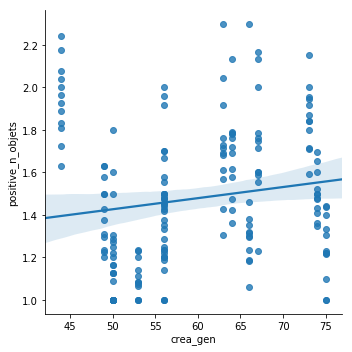

In [0]:
sbn.lmplot(x="crea_gen", y="positive_n_objets", data=total_frame2)
total_frame2.loc[:, ['crea_pow_abs_dist', 'crea_gen', 'participant', 'boolean_n_objets', 'crea_groupX', 'crea_groupM', 'creagen_groupX', 'crea_group']]

In [0]:
##REGRESSION

X = total_frame4[["crea_pow_abs_dist"]]
y = total_frame4["flow_tot"]

model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               flow_tot   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     5479.
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          7.70e-149
Time:                        00:39:27   Log-Likelihood:                -277.83
No. Observations:                 204   AIC:                             557.7
Df Residuals:                     203   BIC:                             561.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
crea_pow_abs_dist     0.0490      0.00

In [0]:
##ANOVA

total_frame2.loc[:, 'vividness_response'] = total_frame2.loc[:, 'vividness.response']
total_frame2.loc[:, 'n_objets_response'] = total_frame2.loc[:, 'n_objets.response']
behav_frame_long.loc[:, 'vividness_response'] = behav_frame_long.loc[:, 'vividness.response']
behav_frame_long.loc[:, 'n_objets_response'] = behav_frame_long.loc[:, 'n_objets.response']

mod = ols(' boolean_n_objets ~ crea_group', data=behav_frame_long).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df           F        PR(>F)
crea_group    53.801654     1.0  227.974167  1.333883e-50
Residual    1443.841319  6118.0         NaN           NaN


In [0]:
total_frame['crea_pow_abs_dist']

0     105.0
1      84.0
2     105.0
3     125.0
4     107.0
5     105.0
6     102.0
7      80.0
8      65.0
9      80.0
10    107.0
11    121.0
12     79.0
13    110.0
14     97.0
15     96.0
16    112.0
Name: crea_pow_abs_dist, dtype: float64

In [55]:
pvalues

,aber,crea_pow_abs_dist,crea_clar_prep,flow_disp,boolean_n_objets,positive_n_objets
aber,0,0.0012,0.9217,0.4369,0.0071,0.0131
crea_pow_abs_dist,0.0012,0,0.956,0.209,0.0047,0.0493
crea_clar_prep,0.9217,0.956,0,0.0678,0.8596,0.8709
flow_disp,0.4369,0.209,0.0678,0,0.5281,0.3446
boolean_n_objets,0.0071,0.0047,0.8596,0.5281,0,0
positive_n_objets,0.0131,0.0493,0.8709,0.3446,0,0


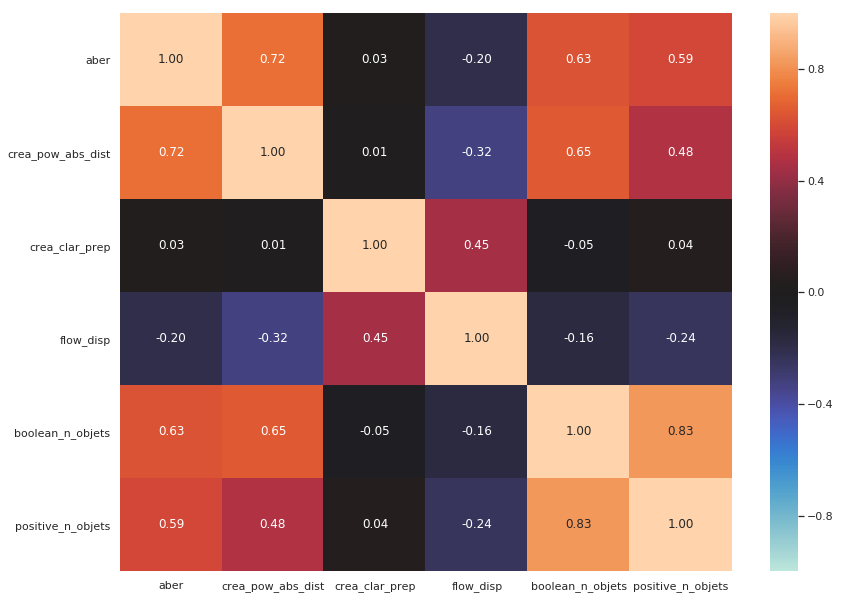

In [69]:
#heatmap_frame = total_frame.loc[:, ['schi', 'schi_inhab', 'crea_pow_abs_dist', 'crea_gen', 'aber', 'crea_clar_prep',  'flow_disp']]
heatmap_frame = total_frame.loc[:, ['aber', 'crea_pow_abs_dist', 'crea_clar_prep', 'flow_disp', 'boolean_n_objets', 'positive_n_objets']]
pvalues = calculate_pvalues(heatmap_frame)
#mask = np.zeros_like(heatmap_frame)
#mask[np.triu_indices_from(mask)] = True

sbn.heatmap(heatmap_frame.corr(method='spearman'), 
            annot=True, 
            fmt=".2f", 
            center=0, vmin=-1, vmax=1)
plt.show()

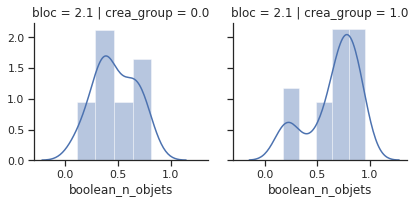

In [0]:
g = sbn.FacetGrid(df_anova2, row='bloc', col='crea_group')
g.map(sbn.distplot, "boolean_n_objets")
plt.show()

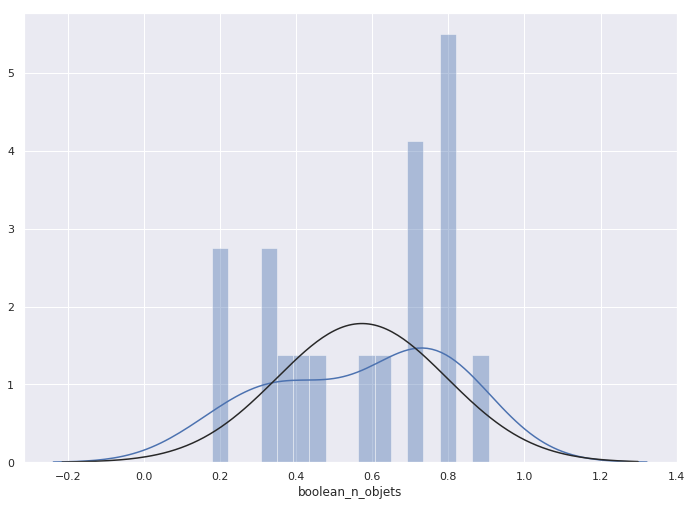

In [0]:
x = total_frame.boolean_n_objets.dropna()
x = total_frame.boolean_n_objets.dropna()

#x = total_frame.Series(x, name="crea_pow_abs_dist")
ax = sbn.distplot(x
                 , bins=17, fit=stats.norm)
#plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
#plt.ylabel('Frequency')

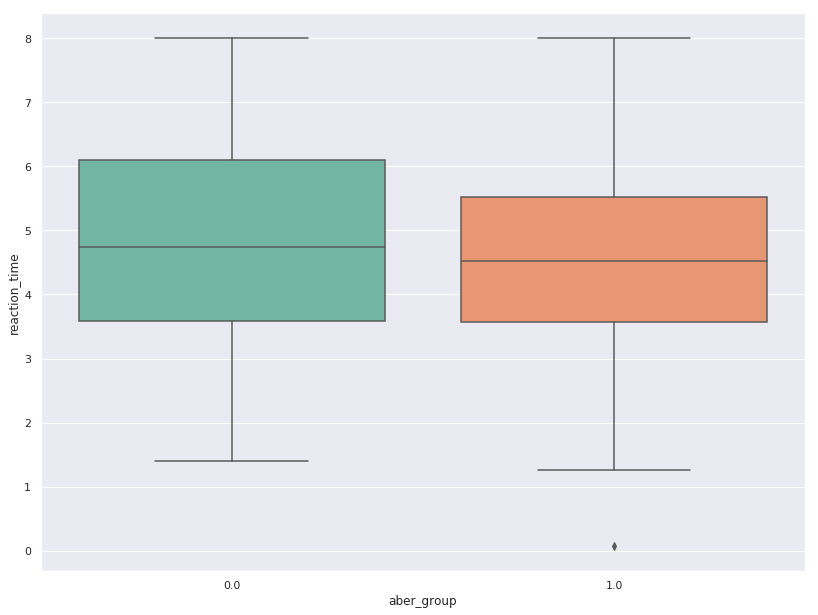

In [78]:
df_anova2=behav_frame_long.groupby(['participant',
                                    'Contrast', 
                                    'bloc', 
                                    'FD'
                                   ]).mean()

sbn.boxplot(x="aber_group", y="reaction_time",# hue="Contrast", 
            data=df_anova2.reset_index(), palette="Set2")
#df_anova2

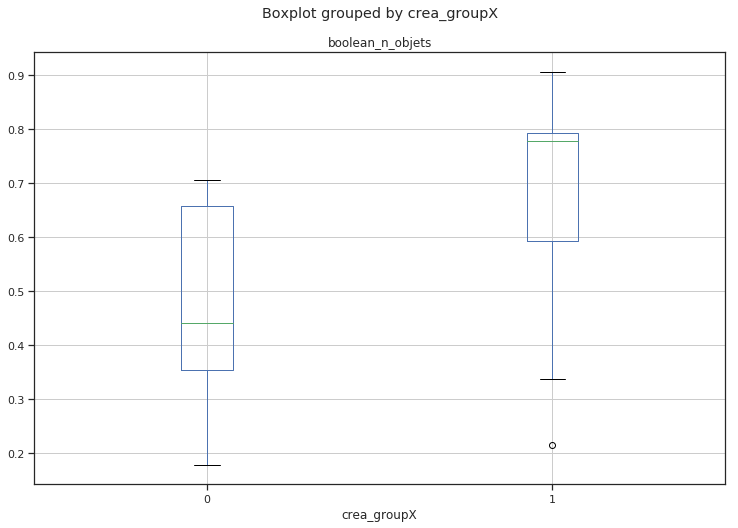

In [0]:
total_frame.boxplot('boolean_n_objets', by='crea_groupX', figsize=(12, 8))

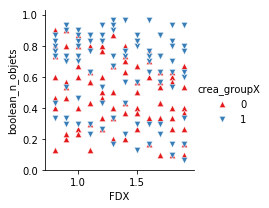

In [0]:
#tips = sbn.load_dataset("behav_frame_crea")
g = sbn.FacetGrid(total_frame2, hue="crea_groupX", palette="Set1", hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "FDX", "boolean_n_objets", s=40, linewidth=.5, edgecolor="white")
g.add_legend();

In [0]:
6840/19


360.0

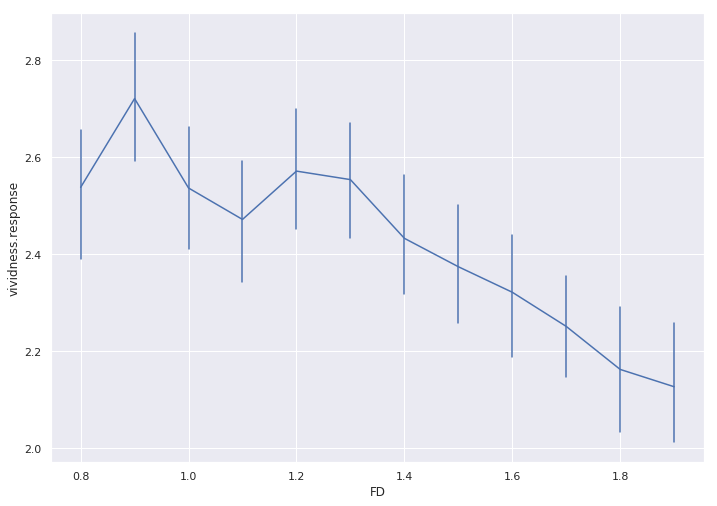

In [0]:

df_anova2=behav_frame_long.groupby(['participant','Contrast', 'bloc', 'FD']).mean()
sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.lineplot(x='FD', y='vividness.response', 
             #hue='aber_group',
             err_style="bars", ci=95, data=behav_frame_long)




In [0]:
df_anova=behav_frame_long.groupby(['participant']).mean()
df_anova
total_frame

,index,participant,Contrast,FD,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,...,crea_group,crea_groupM,schi_group,aber_group,creact_group,creagen_group,crea_groupX,aber_groupX,creagen_groupX,schi_groupX
0,0,1,1.0,1.35,6.00,161.06525,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,1,2,1.0,1.35,5.75,439.27850,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,3,1.0,1.35,6.75,12.76975,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
3,3,4,1.0,1.35,5.50,146.32250,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,4,5,1.0,1.35,5.50,9.37300,NaN,NaN,NaN,NaN,...,1,1,1,1,0,1,1,1,1,1
5,5,6,1.0,1.35,7.25,140.65325,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,1,1,0,1
6,6,7,1.0,1.35,8.00,81.48750,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,7,8,1.0,1.35,7.25,107.02700,NaN,NaN,NaN,NaN,...,0,0,1,1,1,1,0,1,1,1
8,8,9,1.0,1.35,6.00,10.47800,5.00,8.4635,4.50,3.8495,...,0,0,0,0,1,0,0,0,0,0
9,9,10,1.0,1.35,6.50,12.07475,4.00,12.1695,4.00,7.8310,...,0,0,0,0,1,1,0,0,1,0


(0.3, 0.8)

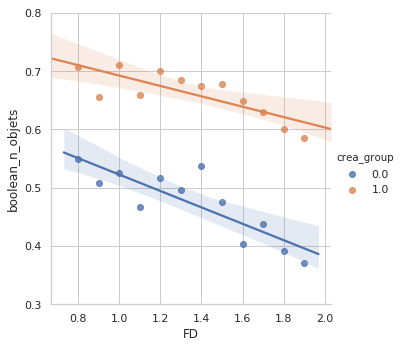

In [0]:
df_anova2=behav_frame_long.groupby(['crea_group', 'FD']).mean()
#rcParams['figure.figsize'] = 11.7,8.27
sbn.lmplot(x='FD', y='boolean_n_objets', 
             hue='crea_group', 
             data=df_anova2.reset_index())
rcParams['figure.figsize'] = 11.7,8.27
plt.ylim(0.3, 0.8)

In [0]:
df_anova=behav_frame_long.groupby(['participant', 'FD', 'Contrast', 'bloc']).mean()
sbn.set(style="whitegrid")
rcParams['figure.figsize'] = 11.7,8.27
g = sbn.barplot(x='bloc', y='positive_n_objets', hue = 'crea_group', ci=95, data=behav_frame_long)
g.set_ylim(1, 2)


NameError: ignored

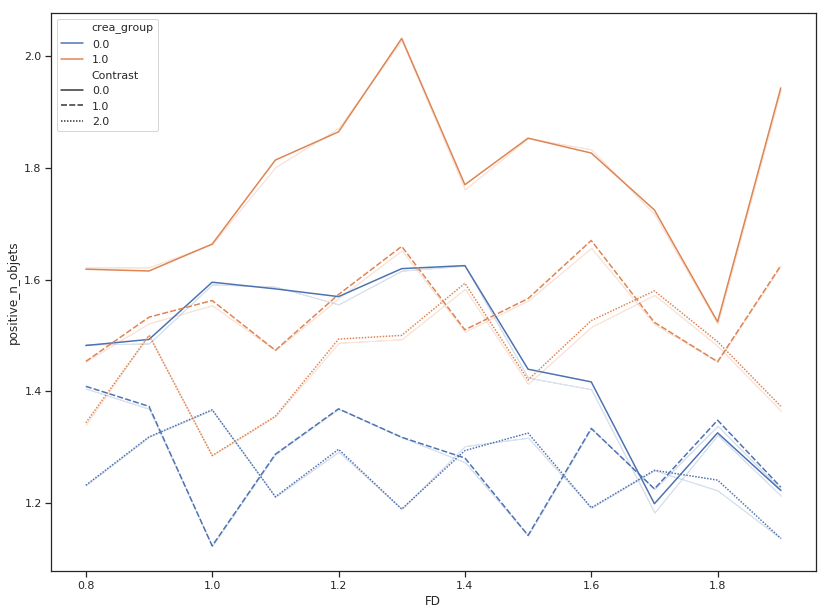

In [0]:
df_anova=behav_frame_long.groupby(['participant', 'FD', 'Contrast', 'bloc']).mean()
rcParams['figure.figsize'] = 13.7,10.27
plotX = sbn.lineplot(x='FD', y='positive_n_objets', hue='crea_group', style='Contrast', ci=0, data=df_anova.reset_index())
#sbn.lineplot(x='FD', y='positive_n_objets', hue='crea_group', style='Contrast', ci=95, data=behav_frame_long)

,participant,FD,Contrast,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,Flow03.response,...,flow_comp,flow_defi,flow,flow_tot,crea_group,crea_groupM,schi_group,aber_group,creact_group,creagen_group
0,1.0,0.8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
1,1.0,0.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
3,1.0,1.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
4,1.0,1.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
5,1.0,1.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
6,1.0,1.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
7,1.0,1.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
8,1.0,1.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
9,1.0,1.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1


In [0]:
total_frame['participant']

,participant,participant
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [0]:
total_frame.dtypes


index                             int64
participant                       int64
Contrast                        float64
FD                              float64
Fatigue.response                float64
Fatigue.rt                      float64
Flow01.response                 float64
Flow01.rt                       float64
Flow02.response                 float64
Flow02.rt                       float64
Flow03.response                 float64
Flow03.rt                       float64
Flow04.response                 float64
Flow04.rt                       float64
Flow05.response                 float64
Flow05.rt                       float64
Flow06.response                 float64
Flow06.rt                       float64
Flow07.response                 float64
Flow07.rt                       float64
Flow08.response                 float64
Flow08.rt                       float64
Flow09.response                 float64
Flow09.rt                       float64
Flow10.response                 float64


In [0]:
##REGRESSION

X = total_frame3[["boolean_n_objets"]]
y = total_frame3["flow_tot"]

model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               flow_tot   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     96.09
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           3.62e-08
Time:                        23:27:11   Log-Likelihood:                -34.926
No. Observations:                  17   AIC:                             71.85
Df Residuals:                      16   BIC:                             72.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
boolean_n_objets     7.5240      0.768  

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


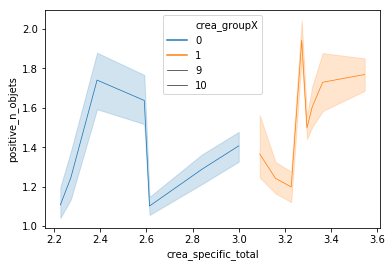

In [0]:
#df_anova=behav_frame_long.groupby(['crea_group','FD']).mean()
total_frame3 = total_frame.loc[:, ['participantX', 'crea_gen', 'crea_pow_abs_dist', 'crea_specific_total', 'boolean_n_objets', 'gough', 'creative_act', 'flow_tot', 'aber', 'schi', 'positive_n_objets', 'n_objets.response', 'aber_groupX', 'crea_groupX', 'schi_groupX', 'creagen_groupX', 'reaction_time', 'vividness.response', 'creact_groupX']]
total_frame4 = total_frame2.loc[:, ['participantX', 'crea_gen', 'crea_pow_abs_dist', 'boolean_n_objets', 'crea_specific_total', 'gough', 'creative_act', 'flow_tot', 'aber', 'schi', 'positive_n_objets', 'n_objets.response', 'FD', 'aber_groupX', 'crea_groupX', 'schi_groupX', 'creagen_groupX', 'reaction_time', 'vividness.response', 'creact_groupX']]

# plot
#sbn.set_style('ticks')
#fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
sbn.lineplot(x="crea_specific_total", y="positive_n_objets",
             hue='crea_groupX', 
             size=10, data=total_frame4, ci=95,
             )
#sbn.despine()
#total_frame3
#column crea or aber
#df_anova.loc[:, ['participantX', 'creagen_group', 'positive_n_objets']]



In [0]:
total_pair = total_frame4.loc[:, ['FD', 'positive_n_objets', 'boolean_n_objets', 'crea_groupX']]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


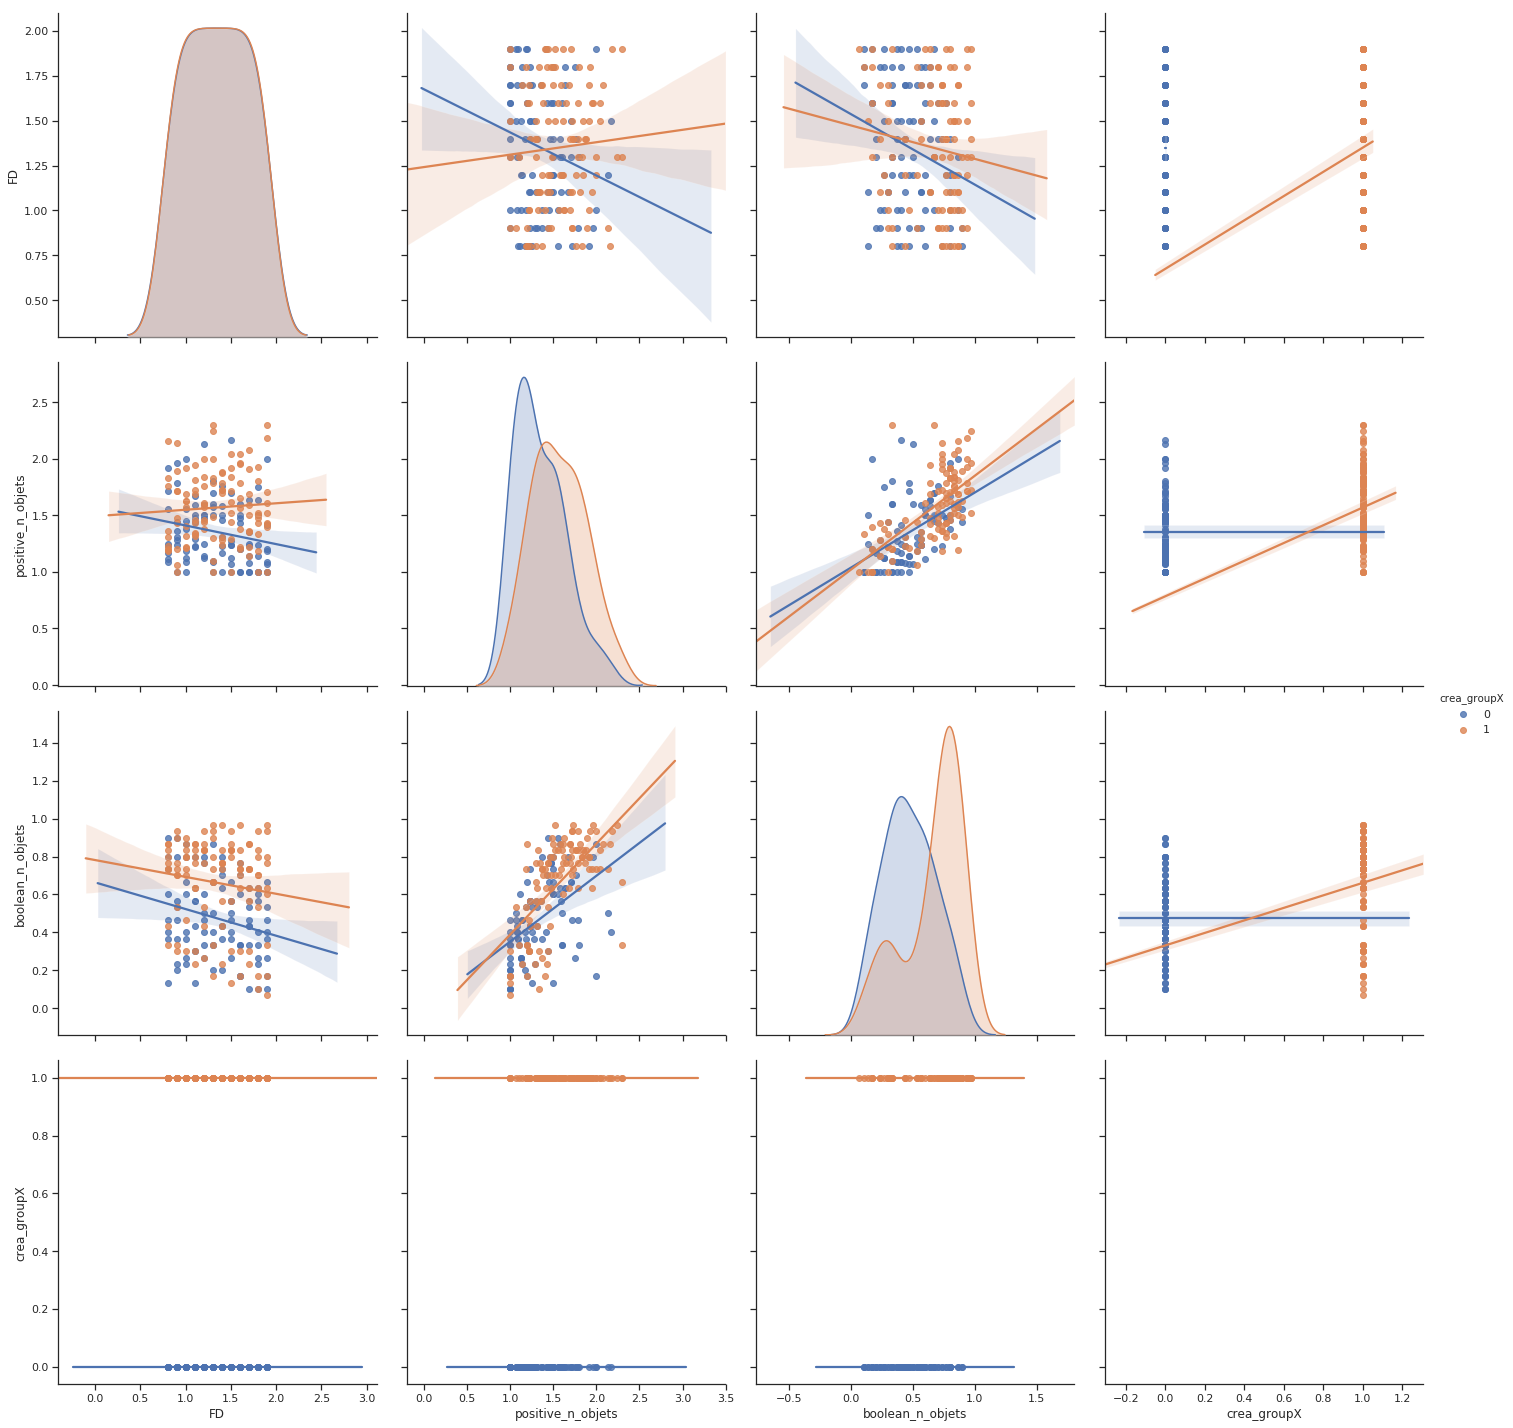

In [0]:
 sbn.pairplot(total_pair, hue="crea_groupX", kind="reg", size=5)

In [0]:
total_frame

,index,participant,Contrast,FD,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,...,flow_comp,flow_defi,flow,flow_tot,crea_group,crea_groupM,schi_group,aber_group,creact_group,creagen_group
0,0,1,1.0,1.35,6.00,161.06525,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
1,1,2,1.0,1.35,5.75,439.27850,NaN,NaN,NaN,NaN,...,3.0,7.0,NaN,5.200,0,0,0,0,0,0
2,2,3,1.0,1.35,6.75,12.76975,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.200,1,1,1,1,1,1
3,3,4,1.0,1.35,5.50,146.32250,NaN,NaN,NaN,NaN,...,7.0,6.0,NaN,4.600,1,1,1,1,1,1
4,4,5,1.0,1.35,5.50,9.37300,NaN,NaN,NaN,NaN,...,2.0,5.0,NaN,5.400,1,1,1,1,0,1
5,5,6,1.0,1.35,7.25,140.65325,NaN,NaN,NaN,NaN,...,8.0,6.0,NaN,5.300,1,1,1,1,0,0
6,6,7,1.0,1.35,8.00,81.48750,NaN,NaN,NaN,NaN,...,7.0,5.0,NaN,5.700,0,0,0,0,0,0
7,7,8,1.0,1.35,7.25,107.02700,NaN,NaN,NaN,NaN,...,5.0,5.0,NaN,5.800,0,0,1,1,1,1
8,8,9,1.0,1.35,6.00,10.47800,5.00,8.4635,4.50,3.8495,...,5.0,5.0,4.550,4.625,0,0,0,0,1,0
9,9,10,1.0,1.35,6.50,12.07475,4.00,12.1695,4.00,7.8310,...,2.0,5.0,4.200,4.700,0,0,0,0,1,1


In [0]:
total_frame2.loc[:, 'boolean_n_objets']

0      0.733333
1      0.533333
2      0.833333
3      0.633333
4      0.433333
5      0.666667
6      0.566667
7      0.566667
8      0.700000
9      0.566667
10     0.533333
11     0.333333
12     0.600000
13     0.566667
14     0.400000
15     0.433333
16     0.466667
17     0.400000
18     0.366667
19     0.500000
20     0.333333
21     0.433333
22     0.400000
23     0.266667
24     0.433333
25     0.300000
26     0.466667
27     0.300000
28     0.533333
29     0.333333
         ...   
150    0.433333
151    0.366667
152    0.166667
153    0.333333
154    0.333333
155    0.366667
156    0.833333
157    0.733333
158    0.866667
159    0.833333
160    0.866667
161    0.933333
162    0.766667
163    0.866667
164    0.633333
165    0.733333
166    0.633333
167    0.633333
168    0.900000
169    0.900000
170    0.666667
171    0.633333
172    0.800000
173    0.866667
174    0.733333
175    0.566667
176    0.766667
177    0.533333
178    0.566667
179    0.533333
Name: boolean_n_objets, 

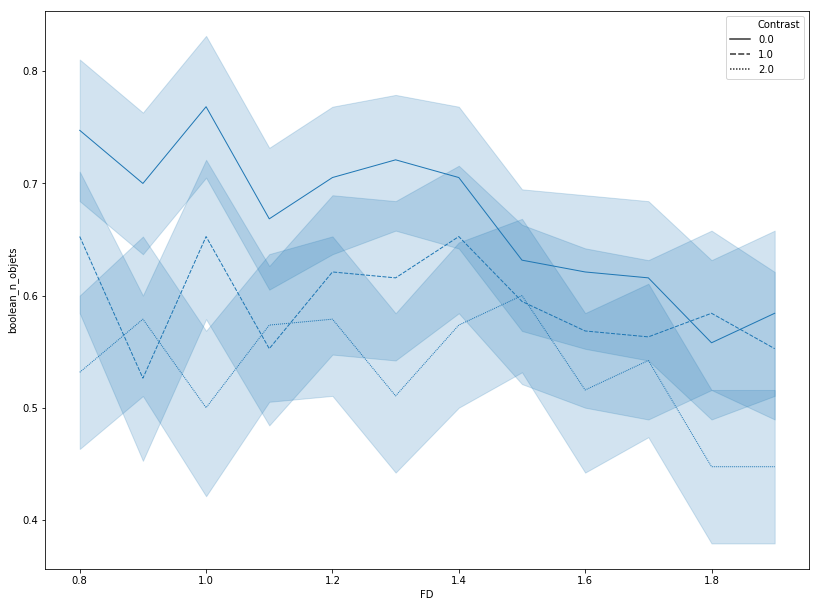

In [0]:
#df_anova=behav_frame_long.groupby(['participant','FD', 'Contrast', 'bloc']).mean()

plot2 = sbn.lineplot(x='FD', y='boolean_n_objets', style='Contrast', lw=1, ci=95, data=behav_frame_long)
#total_frame2.loc[:, ['positive_n_objets', 'crea_pow_abs_dist', 'participant', 'crea_group']]
#err_style="bars"
#units="participant", estimator=None,

In [0]:
180/12

15.0

# La Grosse BIdouille

In [0]:
cd /content/drive/My\ Drive/Data_Pareidolia


/content/drive/My Drive/Data_Pareidolia


In [0]:
total_frame4.to_excel("tot_19n.xlsx")

In [0]:
total_frame_export = total_frame2.loc[:, ['participant', 'vividness.response', 'n_objets.response', 'positive_n_objets', 'reaction_time', 'FD', 'crea_gen', 'crea_anx', 'crea_distinct', 'crea_absorp', 'crea_pow_pleas', 'crea_clar_prep', 'flow_disp', 'creative_act', 'gough', 'schi_impuls', 'schi_inhab', 'schi', 'schi_anhe', 'schi_desorg', 'crea_group', 'crea_gen_transform', 'crea_gen_transpers', 'crea_gen_center', 'crea_pow_abs_dist', 'aber']]
total_frame_export

,participant,participant,vividness.response,n_objets.response,positive_n_objets,reaction_time,FD,crea_gen,crea_anx,crea_distinct,...,schi,schi_anhe,schi_desorg,crea_group,crea_group,crea_gen_transform,crea_gen_transpers,crea_gen_center,crea_pow_abs_dist,aber
0,1,1,2.727273,0.866667,1.181818,4.033145,0.8,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
1,1,1,3.437500,0.566667,1.062500,3.979670,0.9,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
2,1,1,2.920000,1.100000,1.320000,3.877572,1.0,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
3,1,1,2.736842,0.833333,1.315789,4.577258,1.1,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
4,1,1,3.230769,0.633333,1.461538,3.261283,1.2,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
5,1,1,3.100000,0.866667,1.300000,4.183838,1.3,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
6,1,1,2.705882,0.700000,1.235294,4.477227,1.4,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
7,1,1,2.529412,0.733333,1.294118,4.589360,1.5,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
8,1,1,2.571429,0.966667,1.380952,4.925243,1.6,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0
9,1,1,2.941176,0.766667,1.352941,4.963232,1.7,66,18,23,...,23.0,7.0,2.0,1.0,1,20,12,34,105,16.0


In [0]:

sbn.pairplot(total_frame, hue='crea_group', size=2.5);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: ignored

ValueError: ignored

<Figure size 78840x78840 with 413 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


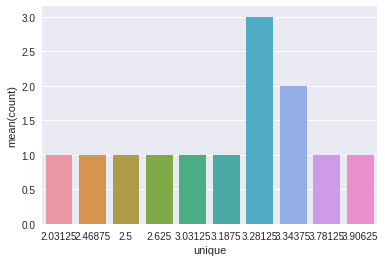

In [0]:
#question_frame = question_frame.sort_values(by=['crea_gen'])
#question_frame
#sbn.barplot(x='crea_gen', y='participant', data=question_frame)


In [0]:

def grouping (question_frame, POW1, POW2, CREA_PHENO, CREA_ACT):

   # Create group variable
  # Group for Creative Power and Pleasure
  conditions = [
    (question_frame['crea_pow_pleas'] <38),
    (question_frame['crea_pow_pleas'] <= 40) & (question_frame['crea_pow_pleas'] >= 38), 
    (question_frame['crea_pow_pleas'] > 40),]

  choices = [0, 1, 2]
  question_frame['crea_group'] = np.select(conditions, choices, default='black')
  # Group for Creative Power, pleasure, absorption and distinctive experience
  conditions2 = [
    (question_frame['crea_pow_abs_dist'] <3.2),
    (question_frame['crea_pow_abs_dist'] > 3.2),]

  choices2 = [0, 1]
  question_frame['crea_group2'] = np.select(conditions2, choices2, default='black')

  #Group for Creative Activities
  
  conditions_act = [
    (question_frame['creative_act'] < 10.5),
    (question_frame['creative_act'] > 10.5),]

  choices_act = [0, 1]
  question_frame['crea_group_act'] = np.select(conditions_act, choices_act, default='black')




  return question_frame







#all_frame
#all_frame.loc[:, ['boolean_n_objets', 'n_objets.response']]


,Contrast,FD,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,Flow03.response,Flow03.rt,...,crea_gen_transpers,crea_gen,creative_act,flow_disp,schi_inhab,schi_desorg,schi_anhe,schi_impuls,schi,crea_group
0,1.0,1.35,6.00,161.06525,NaN,NaN,NaN,NaN,NaN,NaN,...,40,40,16.0,3.944444,4.0,2.0,7.0,10.0,23.0,2
1,1.0,1.35,5.75,439.27850,NaN,NaN,NaN,NaN,NaN,NaN,...,38,38,8.0,3.861111,3.0,2.0,5.0,4.0,14.0,2
2,1.0,1.35,6.75,12.76975,NaN,NaN,NaN,NaN,NaN,NaN,...,40,40,14.0,3.916667,6.0,6.0,4.0,9.0,25.0,2
3,1.0,1.35,5.50,146.32250,NaN,NaN,NaN,NaN,NaN,NaN,...,45,45,13.0,3.555556,5.0,6.0,5.0,6.0,22.0,0
4,1.0,1.35,5.50,9.37300,NaN,NaN,NaN,NaN,NaN,NaN,...,44,44,6.0,4.805556,7.0,9.0,7.0,7.0,30.0,0
5,1.0,1.35,7.25,140.65325,NaN,NaN,NaN,NaN,NaN,NaN,...,40,40,6.0,3.888889,6.0,6.0,5.0,4.0,21.0,2
6,1.0,1.35,8.00,81.48750,NaN,NaN,NaN,NaN,NaN,NaN,...,32,32,4.0,3.611111,4.0,3.0,4.0,6.0,17.0,1
7,1.0,1.35,6.00,10.47800,5.00,8.4635,4.50,3.8495,4.00,3.1165,...,24,24,10.0,4.750000,0.0,1.0,5.0,3.0,9.0,1
8,1.0,1.35,6.50,12.07475,4.00,12.1695,4.00,7.8310,3.00,4.3575,...,40,40,13.0,4.722222,1.0,1.0,5.0,4.0,11.0,2
9,1.0,1.35,7.50,48.54925,4.75,NaN,4.25,NaN,4.50,NaN,...,46,46,5.0,3.555556,3.0,5.0,4.0,4.0,16.0,0


In [0]:
behav_frame_participant
#question_frame.loc[:, ['participant', 'gough']]

,Contrast,FD,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,Flow03.response,Flow03.rt,...,trials_4.thisN,practice,trials_4.thisTrialN,vividness.response,vividness.rt,positive_n_objets,boolean_n_objets,bloc,reaction_time,participant
participant,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.35,6.00,161.06525,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.830986,10.564569,1.328638,0.591667,2.1,4.370057,1
2,1.0,1.35,5.75,439.27850,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.922581,25.596172,1.109677,0.430556,2.1,4.688517,2
3,1.0,1.35,6.75,12.76975,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.425000,22.304195,1.256198,0.336111,2.1,5.344361,3
4,1.0,1.35,5.50,146.32250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.719298,3.978136,1.859649,0.791667,2.1,4.750932,4
5,1.0,1.35,5.50,9.37300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.302682,5.051964,1.729008,0.727778,2.1,4.127944,5
6,1.0,1.35,7.25,140.65325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.687117,3.578181,1.944785,0.905556,2.1,4.362318,6
7,1.0,1.35,8.00,81.48750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.327586,7.057717,1.409483,0.644444,2.1,5.188257,7
8,1.0,1.35,7.25,107.02700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.413580,20.800844,1.722222,0.450000,2.1,8.000000,8
9,1.0,1.35,6.00,10.47800,5.00,8.4635,4.50,3.8495,4.00,3.1165,...,NaN,NaN,NaN,3.671875,57.854619,1.109375,0.177778,2.1,5.143052,9


In [0]:
pd.tools.plotting.scatter_matrix(.loc[:, "V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()

In [0]:


#all_frame['boolean_n_objets'] = all_frame['boolean_n_objets'].astype('float')
#all_frame.dtypes
all_frame_participant = behav_frame.groupby(['participant']).mean()
#all_frame_participant.loc[:, ['boolean_n_objets', 'n_objets.response']]
#all_frame_participant = all_frame.loc[:, ['boolean_n_objets', 'participant']]
#all_frame.loc[:, 'boolean_n_objets']
all_frame_participant
  


,Contrast,FD,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,Flow03.response,Flow03.rt,...,trials_3.thisTrialN,trials_4.thisIndex,trials_4.thisN,practice,trials_4.thisTrialN,vividness.response,vividness.rt,boolean_n_objets,bloc,reaction_time
participant,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.35,6.00,161.06525,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,2.830986,10.564569,0.591667,2.1,4.382743
2,1.0,1.35,5.75,439.27850,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,1.922581,25.596172,0.430556,2.1,4.688517
3,1.0,1.35,6.75,12.76975,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,2.425000,22.304195,0.336111,2.1,5.476028
4,1.0,1.35,5.50,146.32250,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,3.719298,3.978136,0.791667,2.1,4.775165
5,1.0,1.35,5.50,9.37300,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,2.302682,5.051964,0.727778,2.1,4.138397
6,1.0,1.35,7.25,140.65325,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,1.687117,3.578181,0.905556,2.1,4.363864
7,1.0,1.35,8.00,81.48750,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,2.327586,7.057717,0.644444,2.1,5.243632
8,1.0,1.35,7.25,107.02700,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,NaN,NaN,NaN,NaN,2.413580,20.800844,0.450000,2.1,15.911931
9,1.0,1.35,6.00,10.47800,5.00,8.4635,4.50,3.8495,4.00,3.1165,...,71.5,NaN,NaN,NaN,NaN,3.671875,57.854619,0.177778,2.1,5.148086


In [0]:

  


#pd.tools.plotting.scatter_matrix(behav_frame_participant.loc[:, ['vividness.response', 'boolean_n_objets', 'FD']], diagonal="hist",figsize=(10, 10))
#plt.tight_layout()
#plt.show()

# La Petite Bidouille

In [0]:
behav_frame_participant


,Contrast,FD,Fatigue.response,Fatigue.rt,Flow01.response,Flow01.rt,Flow02.response,Flow02.rt,Flow03.response,Flow03.rt,...,trials_4.thisN,practice,trials_4.thisTrialN,vividness.response,vividness.rt,positive_n_objets,boolean_n_objets,bloc,reaction_time,participant
participant,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.35,6.00,161.06525,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.830986,10.564569,1.328638,0.591667,2.1,4.370057,1
2,1.0,1.35,5.75,439.27850,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.922581,25.596172,1.109677,0.430556,2.1,4.688517,2
3,1.0,1.35,6.75,12.76975,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.425000,22.304195,1.256198,0.336111,2.1,5.344361,3
4,1.0,1.35,5.50,146.32250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.719298,3.978136,1.859649,0.791667,2.1,4.750932,4
5,1.0,1.35,5.50,9.37300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.302682,5.051964,1.729008,0.727778,2.1,4.127944,5
6,1.0,1.35,7.25,140.65325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.687117,3.578181,1.944785,0.905556,2.1,4.362318,6
7,1.0,1.35,8.00,81.48750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.327586,7.057717,1.409483,0.644444,2.1,5.188257,7
8,1.0,1.35,7.25,107.02700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.413580,20.800844,1.722222,0.450000,2.1,8.000000,8
9,1.0,1.35,6.00,10.47800,5.00,8.4635,4.50,3.8495,4.00,3.1165,...,NaN,NaN,NaN,3.671875,57.854619,1.109375,0.177778,2.1,5.143052,9


In [0]:
#behav_frame_participant
total_frame = behav_frame_participant.merge(question_frame, how = 'inner', on = ['participant'])
total_frame.loc[:, 'participant']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      9
8     10
9     12
10    14
Name: participant, dtype: int64

In [0]:
question_frame.loc[:, ['participant', 'gough', 'crea_absorp', 'crea_gen', 'crea_group2']]
#question_frame.iloc[:, 132]

,participant,gough,crea_absorp,crea_gen,crea_group2
9,1,5.0,42,66,1
10,2,2.0,24,53,0
1,3,11.0,39,75,1
2,4,9.0,40,73,1
4,5,5.0,36,63,1
0,6,5.0,36,44,1
5,7,6.0,36,49,0
7,9,-2.0,23,50,0
3,10,10.0,24,56,0
11,11,-1.0,32,56,1


In [0]:
question_frame.loc[:, ['participant', 'schi']]

,participant,schi
9,1,23.0
10,2,14.0
1,3,25.0
2,4,22.0
4,5,30.0
0,6,21.0
5,7,17.0
7,9,9.0
3,10,11.0
11,11,16.0


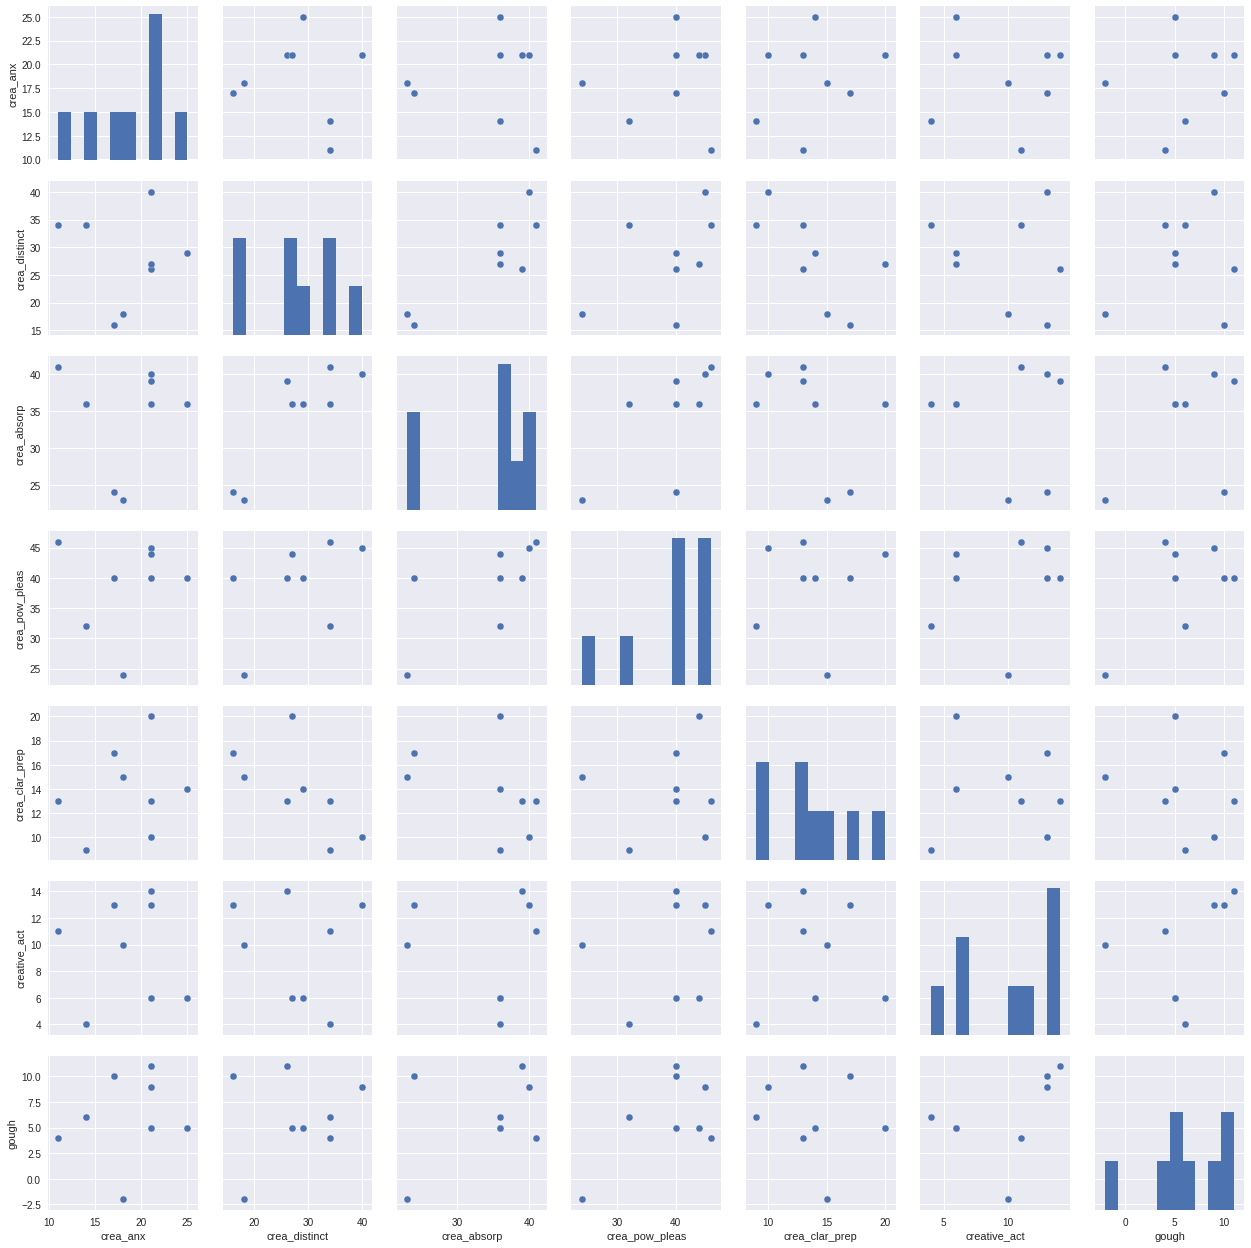

In [0]:
sb.pairplot(df_corr)

In [0]:
df_corr = question_frame.loc[:, ['crea_anx', 'crea_distinct', 'crea_absorp', 'crea_pow_pleas', 'crea_clar_prep', 'creative_act', 'gough', 'crea_gen']]

df_corr.corr(method='pearson')

,crea_anx,crea_distinct,crea_absorp,crea_pow_pleas,crea_clar_prep,creative_act,gough,crea_gen
crea_anx,1.000000,0.027036,0.232552,0.305539,0.298658,0.115283,0.075929,0.305539
crea_distinct,0.027036,1.000000,0.709066,0.463288,-0.553409,-0.165999,0.245382,0.463288
crea_absorp,0.232552,0.709066,1.000000,0.646181,-0.252368,0.271088,0.330171,0.646181
crea_pow_pleas,0.305539,0.463288,0.646181,1.000000,0.166661,0.314644,0.467829,1.000000
crea_clar_prep,0.298658,-0.553409,-0.252368,0.166661,1.000000,-0.007667,-0.140577,0.166661
creative_act,0.115283,-0.165999,0.271088,0.314644,-0.007667,1.000000,0.314627,0.314644
gough,0.075929,0.245382,0.330171,0.467829,-0.140577,0.314627,1.000000,0.467829
crea_gen,0.305539,0.463288,0.646181,1.000000,0.166661,0.314644,0.467829,1.000000


In [0]:
df_corr.loc[:, 'reaction_time'] = df_corr.loc[:, 'reaction_time'].clip(0, 8)

In [0]:
df_corr.describe()

,crea_anx,crea_distinct,crea_absorp,crea_pow_pleas,crea_clar_prep,creative_act,gough,crea_gen
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,17.545455,26.636364,33.272727,38.090909,13.545455,9.818182,5.636364,38.090909
std,4.698162,7.228731,7.630084,6.789029,3.045115,3.894051,3.695206,6.789029
min,9.000000,16.000000,23.000000,24.000000,9.000000,4.000000,-2.000000,24.000000
25%,15.500000,22.500000,24.500000,35.000000,12.500000,6.500000,4.500000,35.000000
50%,18.000000,26.000000,36.000000,40.000000,13.000000,10.000000,5.000000,40.000000
75%,21.000000,31.500000,39.500000,42.000000,14.500000,13.000000,8.000000,42.000000
max,25.000000,40.000000,42.000000,46.000000,20.000000,16.000000,11.000000,46.000000


In [0]:
df_behav = behav_frame.loc[:, ['participant', 'vividness.response', 'n_objets.response', 'reaction_time', 'FD', 'boolean_n_objets', 'bloc', 'positive_n_objets']]

df_behav.corr(method='spearman')

,participant,vividness.response,n_objets.response,reaction_time,FD,boolean_n_objets,bloc,positive_n_objets
participant,1.000000,-0.092802,0.093917,-0.021936,0.000000,0.067165,0.000000,0.100121
vividness.response,-0.092802,1.000000,0.162673,-0.173885,-0.131020,NaN,-0.073982,0.162673
n_objets.response,0.093917,0.162673,1.000000,-0.369313,-0.056278,0.901670,0.000060,1.000000
reaction_time,-0.021936,-0.173885,-0.369313,1.000000,0.063493,-0.100524,-0.113501,-0.360467
FD,0.000000,-0.131020,-0.056278,0.063493,1.000000,-0.064504,0.000000,0.006510
boolean_n_objets,0.067165,NaN,0.901670,-0.100524,-0.064504,1.000000,-0.044326,NaN
bloc,0.000000,-0.073982,0.000060,-0.113501,0.000000,-0.044326,1.000000,0.121927
positive_n_objets,0.100121,0.162673,1.000000,-0.360467,0.006510,NaN,0.121927,1.000000


In [0]:
df_crea2 = total_frame.loc[:, ['crea_gen', 'crea_group', 'boolean_n_objets', 'vividness.response', 'n_objets.response', 'positive_n_objets', 'schi']]
df_crea2

,crea_gen,crea_group,boolean_n_objets,vividness.response,n_objets.response,positive_n_objets,schi
0,40,2,0.591667,2.830986,0.786111,1.328638,23.0
1,38,2,0.430556,1.922581,0.477778,1.109677,14.0
2,40,2,0.336111,2.425000,0.422222,1.256198,25.0
3,45,0,0.791667,3.719298,1.472222,1.859649,22.0
4,44,0,0.727778,2.302682,1.258333,1.729008,30.0
5,40,2,0.905556,1.687117,1.761111,1.944785,21.0
6,32,1,0.644444,2.327586,0.908333,1.409483,17.0
7,24,1,0.177778,3.671875,0.197222,1.109375,9.0
8,40,2,0.694444,2.140000,1.155556,1.664000,11.0
9,46,0,0.213889,2.675325,0.261111,1.220779,16.0


In [0]:
df_crea = total_frame.loc[:, ['participant', 'vividness.response', 'n_objets.response', 'positive_n_objets', 'reaction_time', 'FD', 'crea_gen', 'crea_anx', 'crea_distinct', 'crea_absorp', 'crea_pow_pleas', 'crea_clar_prep', 'flow_disp', 'creative_act', 'gough', 'schi_impuls', 'schi_inhab', 'schi', 'schi_anhe', 'schi_desorg', 'crea_group', 'crea_gen_transform', 'crea_gen_transpers', 'crea_gen_center', 'crea_pow_abs_dist']]
#df_crea.loc[:, ['crea_gen_transform', 'crea_gen_transpers']]
df_crea.corr(method='spearman')

,participant,vividness.response,n_objets.response,positive_n_objets,reaction_time,FD,crea_gen,crea_anx,crea_distinct,crea_absorp,...,gough,schi_impuls,schi_inhab,schi,schi_anhe,schi_desorg,crea_gen_transform,crea_gen_transpers,crea_gen_center,crea_pow_abs_dist
participant,1.000000,-0.223776,-0.202797,-0.083916,0.034965,-0.314358,-0.263160,-0.553247,0.098246,-0.335110,...,-0.126764,-0.789467,-0.106203,-0.472855,-0.448638,0.063608,-0.042711,-0.492970,-0.270177,-0.165791
vividness.response,-0.223776,1.000000,-0.307692,-0.188811,0.377622,-0.107167,0.340353,0.184416,0.070176,0.179901,...,0.035212,0.392947,-0.297368,0.140105,0.109332,-0.141351,0.185083,0.300069,0.438599,0.158736
n_objets.response,-0.202797,-0.307692,1.000000,0.951049,-0.678322,0.307213,0.098246,0.347553,0.491231,0.483264,...,0.323952,0.275063,0.573495,0.395797,0.188504,0.310972,0.167286,0.228624,0.070176,0.550286
positive_n_objets,-0.083916,-0.188811,0.951049,1.000000,-0.559441,0.178612,0.115790,0.368831,0.498249,0.497374,...,0.471843,0.303641,0.591196,0.472855,0.169653,0.395782,0.206438,0.200046,0.056141,0.539704
reaction_time,0.034965,0.377622,-0.678322,-0.559441,1.000000,-0.285780,-0.126317,-0.021279,-0.007018,-0.201066,...,0.190146,0.007144,-0.219486,0.045534,-0.301606,0.148418,0.007119,-0.207190,-0.235089,-0.303363
FD,-0.314358,-0.107167,0.307213,0.178612,-0.285780,1.000000,-0.014339,0.521753,-0.060942,-0.118928,...,-0.179875,-0.109489,-0.075952,-0.239760,0.046221,-0.234671,-0.094546,-0.072993,0.010754,0.072078
crea_gen,-0.263160,0.340353,0.098246,0.115790,-0.126317,-0.014339,1.000000,0.138798,0.163732,0.607088,...,0.279154,0.424799,0.337491,0.391916,-0.134308,0.141848,0.744719,0.774318,0.846831,0.607088
crea_anx,-0.553247,0.184416,0.347553,0.368831,-0.021279,0.521753,0.138798,1.000000,0.202859,0.193205,...,0.042858,0.518130,0.344704,0.504479,0.263851,0.372762,-0.061372,0.115945,0.053384,0.436500
crea_distinct,0.098246,0.070176,0.491231,0.498249,-0.007018,-0.060942,0.163732,0.202859,1.000000,0.615938,...,0.084806,0.143392,0.557748,0.390159,-0.444540,0.528382,0.180376,0.168486,0.160211,0.769922
crea_absorp,-0.335110,0.179901,0.483264,0.497374,-0.201066,-0.118928,0.607088,0.193205,0.615938,1.000000,...,0.277087,0.562207,0.633933,0.689063,-0.091283,0.335116,0.371649,0.663116,0.610628,0.750890


In [0]:
pvalues = calculate_pvalues(df_crea)
pvalues

,participant,vividness.response,n_objets.response,positive_n_objets,reaction_time,FD,crea_gen,crea_anx,crea_distinct,crea_absorp,...,creative_act,gough,schi_impuls,schi_inhab,schi,schi_anhe,schi_desorg,crea_gen_transform,crea_gen_transpers,crea_gen_center
participant,0,0.4845,0.5273,0.7954,0.9141,0.3197,0.4086,0.0621,0.7613,0.287,...,0.1976,0.6946,0.0023,0.7425,0.1205,0.1435,0.8443,0.8951,0.1034,0.3957
vividness.response,0.4845,0,0.3306,0.5567,0.2262,0.7403,0.279,0.5661,0.8284,0.5758,...,0.3173,0.9135,0.2064,0.3479,0.6641,0.7352,0.6612,0.5647,0.3433,0.1538
n_objets.response,0.5273,0.3306,0,0,0.0153,0.3314,0.7613,0.2683,0.1048,0.1115,...,0.9741,0.3043,0.3869,0.0512,0.2028,0.5574,0.3252,0.6033,0.4748,0.8284
positive_n_objets,0.7954,0.5567,0,0,0.0586,0.5786,0.7201,0.2381,0.0992,0.0999,...,0.9482,0.1215,0.3373,0.0429,0.1205,0.5981,0.2028,0.5198,0.533,0.8624
reaction_time,0.9141,0.2262,0.0153,0.0586,0,0.3679,0.6957,0.9477,0.9827,0.5309,...,0.7447,0.5539,0.9824,0.4931,0.8883,0.3407,0.6453,0.9825,0.5182,0.462
FD,0.3197,0.7403,0.3314,0.5786,0.3679,0,0.9647,0.0819,0.8508,0.7128,...,0.4113,0.5759,0.7348,0.8145,0.4529,0.8866,0.4628,0.7701,0.8216,0.9735
crea_gen,0.4086,0.279,0.7613,0.7201,0.6957,0.9647,0,0.6671,0.6111,0.0363,...,0.0154,0.3796,0.1687,0.2833,0.2077,0.6773,0.6601,0.0055,0.0031,0.0005
crea_anx,0.0621,0.5661,0.2683,0.2381,0.9477,0.0819,0.6671,0,0.5272,0.5474,...,0.9475,0.8948,0.0844,0.2725,0.0944,0.4073,0.2327,0.8497,0.7197,0.8691
crea_distinct,0.7613,0.8284,0.1048,0.0992,0.9827,0.8508,0.6111,0.5272,0,0.033,...,0.296,0.7933,0.6566,0.0595,0.2099,0.1476,0.0774,0.5748,0.6007,0.6189
crea_absorp,0.287,0.5758,0.1115,0.0999,0.5309,0.7128,0.0363,0.5474,0.033,0,...,0.2514,0.3833,0.0571,0.0269,0.0132,0.7778,0.287,0.2342,0.0187,0.0349
